# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #11
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, April 27th 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Homework #8 Revisited

Recall the context of Homework #8: 

A plant nursery in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to create an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each (the desired effect). 

Out of 197 initial cross-breedings, the nursery obtained the following distribution over the four types of child plants: 
$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$
where $y_i$ represents the number of child plants that are of type $i$.

They know that the probability of obtaining each type of child plant in any single breeding experiment is as follows:
$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4},$$
where $\theta$ is unknown.

Sensibly, the nursery chose to model the observed data using a multinomial model; *they also imposed a prior on $\theta$, $\rm{Beta}(a, b)$*.

Recall that to simplify sampling from their Bayesian model, the nursery augmented the data with a new variable $z$ such that:
$$z + (y_1 - z) = y_1.$$
That is, using $z$, they are breaking $y_1$, the number of type I child plants, into two subtypes. Let the probability of obtain the two subtype be $1/2$ and $\theta/4$, respectively.

In Homework 8, you implemented a Gibbs sampler for this Bayesian model to compute the posterior mean estimate of $\theta$. 

In this homework we will investigate ways to compute the Maximum Likelihood Estimate (MLE) of $\theta$.

***Note:*** Expectation Maximization can also be applied to compute the posterior mode (MAP) estimates. We are choosing not to do that in this homework so that you are not just repeating the task from Homework #8.


### Part A:

Treat the augmented model as a latent variable model. Write down an expression (up to unimportant constants - you must decide what unimportant means) for each of the following:

(1) the observed data log likelihood

(2) the complete(full) data log likelihood

**Hint:** You should already have the observed data likelihood and the complete data likelihood from Homework #8, you just need to take their logs for this problem.

(3) the Auxilary function, $Q(\theta, \theta^{(t-1)})$, or the expected complete(full) data log likelihood, defined by
$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\text{the complete data log likelihood}]$$

In other words $Z  \vert  Y=y, \Theta = \theta^{t-1}$ is $q(z, \theta_{old})$ at the end of the E-step from the EM lecture. The Auxilary function $Q$ is the ELBO minus the entropy of $q$ (which being evaluated at $\theta_{old}$ is not dependent on $\theta$ and thus irrelevant for maximization).

### Part B:

We will maximize the likelihood through Expectation Maximization (EM). In order to preform EM, we must iterate through the following steps

- (Expectation) Compute the Auxilary function, $Q(\theta, \theta^{t-1})$ (the expectation of the full data likelihood)
- (Maximization) Compute $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$

Thus, you must compute exact formulae for the following:
1. the Auxilary function, $Q(\theta, \theta^{(t-1)})$, for a given $\theta^{(t-1)}$. That is, compute the expectation of the complete data log likelihood.
2. $\theta^{t}$, by maximizing the Auxilary function $Q(\theta, \theta^{(t-1)})$.

**Hint:** You don't actually need to do any difficult optimization for the M-step. After taking the expectation of the complete data log likelihood in the E-step, match your $Q(\theta, \theta^{(t-1)})$ to the log pdf of a familiar distribution, then use the known formula for the mode of this distribution to optimize $Q(\theta, \theta^{(t-1)})$.

Use these to **estimate the MLE** of $\theta$ using EM (choose your own reasonable criterion for convergence).

### Extra Credit:

Explain the advantage of treating this problem like a latent variable model and using EM to compute the MLE (i.e. why not compute MLE directly by maximizing the likelihood?)

Compare this value with the posterior mean estimate of $\theta$ from Homework #8. In general, what is the difference between MLE and MAP or posterior mean estimates of model parameters? That is, name a couple of major pro's and con's of each type of estimate.

### Part A:

Treat the augmented model as a latent variable model. Write down an expression (up to unimportant constants - you must decide what unimportant means) for each of the following:

(1) the observed data log likelihood

(2) the complete(full) data log likelihood

**Hint:** You should already have the observed data likelihood and the complete data likelihood from Homework #8, you just need to take their logs for this problem.

(3) the Auxilary function, $Q(\theta, \theta^{(t-1)})$, or the expected complete(full) data log likelihood, defined by
$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\text{the complete data log likelihood}]$$

In other words $Z  \vert  Y=y, \Theta = \theta^{t-1}$ is $q(z, \theta_{old})$ at the end of the E-step from the EM lecture. The Auxilary function $Q$ is the ELBO minus the entropy of $q$ (which being evaluated at $\theta_{old}$ is not dependent on $\theta$ and thus irrelevant for maximization).


<font color = "blue">
(1) 
$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$
Therefore, the observed data log likelihood:
$$L(y  \vert  \theta)  \propto y_1log(2+\theta) + (y_2+y_3)log(1-\theta) + y_4log(\theta)
$$


(2) Using $z$, we are breaking $y_1$, the number of type I child plants, into two subtypes. Let the probability of obtain the two subtype be $1/2$ and $\theta/4$, respectively. Now, we can interpret $y_1$ to be the total number of trials in a binomial trial. Thus, the new likelihood can be written as


$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

$$ L(y,z;\theta )\propto zlog(\theta )+(y_{ 2 }+y_{ 3 })log(1-\theta )+y_{ 4 }log(\theta )=(z+y_{ 4 })log(\theta )+(y_{ 2 }+y_{ 3 })log(1-\theta )
$$

(3) $$Q(\theta ,\theta ^{ (t-1) })={ E }_{ Z\vert Y=y,\Theta =\theta ^{ t-1 } }((z+y_{ 4 })log(\theta )+(y_{ 2 }+y_{ 3 })log(1-\theta )|y_{ 1 },y_{ 2 },y_{ 3 },y_{ 4 })=({ E }_{ Z\vert Y=y,\Theta =\theta ^{ t-1 } }(z|y_{ 1 })+y_{ 4 })log(\theta )+(y_{ 2 }+y_{ 3 })log(1-\theta )$$

$$
p(z\vert \theta ,y)\propto \binom{y_{1}}{z} \left( \frac { 1 }{ 2 }  \right) ^{ y_{ 1 }-z }\left( \frac { \theta  }{ 4 }  \right) ^{ z } $$

Since $  \frac { 1 }{ 2 }  +\frac { \theta  }{ 4 } =\frac { 2+\theta  }{ 4 } \neq 1$, we need to normalize it,

$$
p(z\vert \theta ,y)\propto \frac { { y_{ 1 } }{ z }\left( \frac { 1 }{ 2 } \times \frac { 4 }{ 2+\theta  }  \right) ^{ y_{ 1 }-z }\left( \frac { \theta  }{ 4 } \times \frac { 4 }{ 2+\theta  }  \right) ^{ z } }{ (\frac { 4 }{ 2+\theta  } )^{ y_{ 1 } } } \propto { y_{ 1 } }{ z }\left( \frac { 1 }{ 2 } \times \frac { 4 }{ 2+\theta  }  \right) ^{ y_{ 1 }-z }\left( \frac { \theta  }{ 4 } \times \frac { 4 }{ 2+\theta  }  \right) ^{ z } \sim Binomial(y_1,\frac { \theta  }{ 4 } \times \frac { 4 }{ 2+\theta  } )
$$

Therefore,  
$${ E }_{ Z\vert Y=y,\Theta =\theta ^{ t-1 } }(z|y_{ 1 })\quad =\frac { \theta  }{ 2+\theta  } y_{ 1 }
$$
$$Q(\theta ,\theta ^{ (t-1) })=(\frac { \theta ^{ t-1 } }{ 2+\theta ^{ t-1 } } y_{ 1 }+y_{ 4 })log(\theta )+(y_{ 2 }+y_{ 3 })log(1-\theta )$$

To calculate the first dirivative,
Let $A=  \frac { \theta ^{ t-1 } }{ 2+\theta ^{ t-1 } } y_{ 1 } + y_4$,  B = $y_2 + y_3$
$$\theta^{t} = \frac{A}{A+B} = \frac{\frac { \theta ^{ t-1 } }{ 2+\theta ^{ t-1 } } y_{ 1 } + y_4}{\frac { \theta ^{ t-1 } }{ 2+\theta ^{ t-1 } } y_{ 1 }+y_2 + y_3 + y_4}
$$

By iterative steps, we can get the converged value of $\theta$

In [8]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import pymc3 as pm

In [9]:
theta_ini = 0.5
ite = 20
theta = np.zeros(ite)
y = [125,18,20,34]
y1 = y[0]
y2 = y[1]
y3 = y[2]
y4 = y[3]
q = np.zeros(ite)

theta[0] = theta_ini
for i in range(1,ite):
    a = (y1 * theta[i-1]) / (2 + theta[i-1])
    theta[i] = (a + y4) / (a + y2 + y3 + y4)
    
    
    

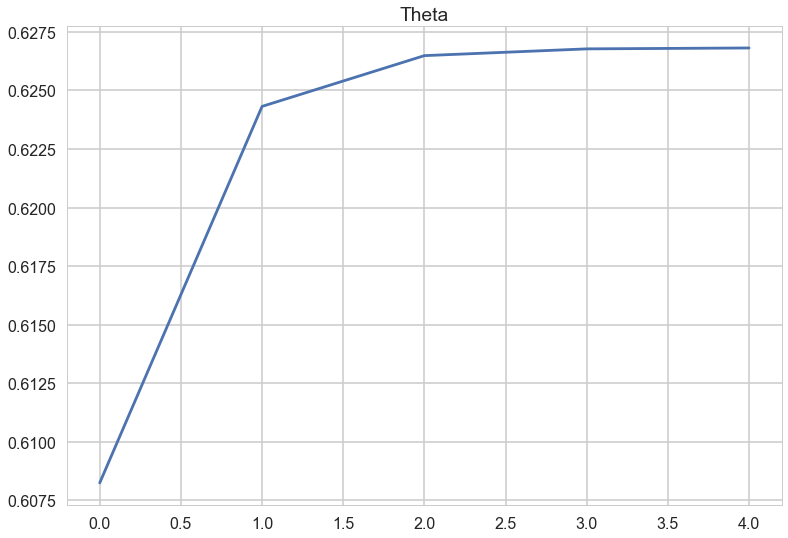

In [10]:
theta
plt.title('Theta')
plt.plot(theta[1:6])
plt.show()

In [11]:
print ('theta:',theta[-1])

theta: 0.626821497871


In [12]:
from scipy.stats import binom
mle = []
for i in range(len(theta)):
    #rv = binom(y1, theta[i]/(2+theta[i]))
    mle.append(theta[i]/(2+theta[i]))

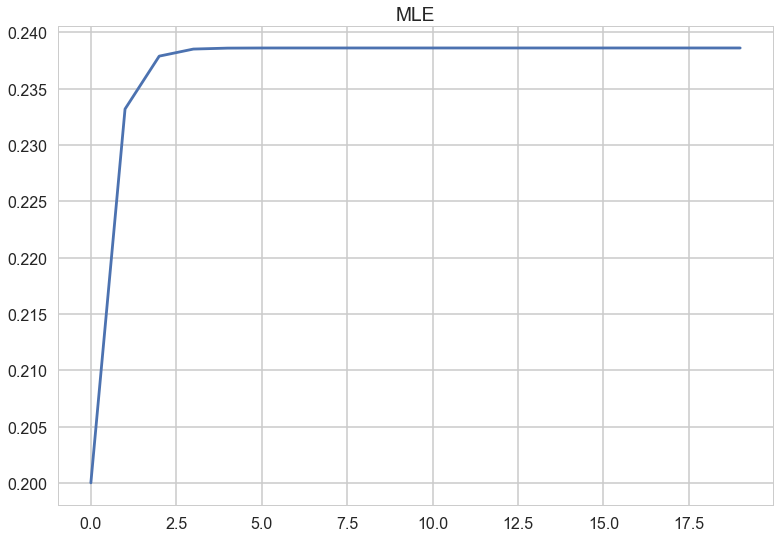

In [14]:
plt.plot(mle)
plt.title('MLE')


## Extra Credit:

Explain the advantage of treating this problem like a latent variable model and using EM to compute the MLE (i.e. why not compute MLE directly by maximizing the likelihood?)

<font color = "blue">
When the MLE is not in closed form, a commonly used algorithm for finding this is the Newton-Raphson algorithm. However, there are plenty of problems where the algorithm fails, such as mixture models. On the other hand, EM algorithm tends to be much more numerically stable than gradient based methods because the proposed parameter values are always valid. 

Another advantage are that we do not have to calculate the likelihood to insure it has increased at every step bacause EM can ensure the increase of likelihood. This is a big deal if the update can be calculated quickly, but MLE cannot. 





Compare this value with the posterior mean estimate of $\theta$ from Homework #8. In general, what is the difference between MLE and MAP or posterior mean estimates of model parameters? That is, name a couple of major pro's and con's of each type of estimate.
<font color = "blue">
In HW8, $\theta$ = 0.614, and in this HW, $\theta$ = 0.614, they are the same. 

1) The maximum likelihood estimate (MLE) of a parameter is the value of the parameter that maximizes the likelihood, where the likelihood is a function of the parameter and is actually equal to the probability of the data conditioning on that parameter. If we keep the data fixed (i.e., it has been observed) and allow the parameters to vary. In that case, the likelihood function can tell us the likelihood of any particular parameter setting. 

The maximum likelihood estimate (MLE) is simply the mode of the likelihood in that second scenario.



Ad: MLE has desirable mathematical and optimality properties. They become minimum variance unbiased estimators as the sample size increases. By unbiased, we mean that if we take (a very large number of) random samples with replacement from a population, the average value of the parameter estimates will be theoretically exactly equal to the population value. By minimum variance, we mean that the estimator has the smallest variance, and thus the narrowest confidence interval, of all estimators of that type.



Dis: The problem with MLE is that it overfits the data, meaning that the variance of the parameter estimates is high, 
or put another way, that the outcome of the parameter estimate is sensitive to random variations in data (which becomes pathological with small amounts of data). To deal with this, it usually helps to add regularisation to MLE (i.e., reduce variance by introducing bias into the estimate).



2) Maximum a posteriori (MAP) estimation is the value of the parameter that maximizes the entire posterior distribution (which is calculated using the likelihood). A MAP estimate is the mode of the posterior distribution.  In maximum a posteriori (MAP), the regularisation is achieved by assuming that the parameters themselves are also (in addition to the data) drawn from a random process. The prior beliefs about the parameters determine what this random process looks like.


Ad: MAP performs well if the data size is not large but we have strong prior belifs compared with MLE.


Dis:  if the prior beliefs are strong, then the observed data have relatively little impact on the parameter estimates, (i.e., low variance but high bias), while if the prior beliefs are weak, then the outcome is more like standard MLE (i.e., low bias but high variance). This leads to two interesting limits: for an infinite amount of data, MAP gives the same result as MLE (as long as the prior is non-zero everywhere in parameter space); for an infinitely weak prior belief (i.e., uniform prior), MAP also gives the same result as MLE.



Note that there is no difference between the MLE and the MAP estimate if the prior distribution we were assuming was a constant.